In [1]:
from texascovid19 import data, constants
import matplotlib.pyplot as plt
import pandas as pd

# Top N counties

In [2]:
TOP_N = 10

In [3]:
df_timeseries = data.get_timeseries()

In [4]:
last_date = df_timeseries.columns[-1]

In [5]:
df_ordered = df_timeseries.sort_values(last_date, ascending=False)

In [6]:
x = df_timeseries.columns.tolist()

In [7]:
TOP_N_COUNTIES = df_ordered.index.tolist()[:TOP_N]

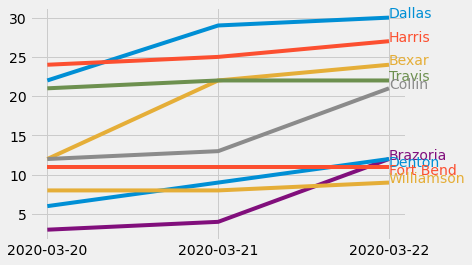

In [8]:
plt.style.use('fivethirtyeight')
last_cnts = set()
for county in TOP_N_COUNTIES:
    if county == "Pending County Assignment":
        continue
    last_cnt = df_timeseries.loc[county][-1]
    while last_cnt in last_cnts:
        last_cnt -= 1
    last_cnts.add(last_cnt)
    line = plt.plot(x, df_timeseries.loc[county], label=county)
    color = line[0].get_color()
    plt.text(x[-1], last_cnt, county, color=color)

    #plt.legend()


# By metro area

In [9]:
df_metro = data.get_timeseries(agg_metro=True).drop('Other')

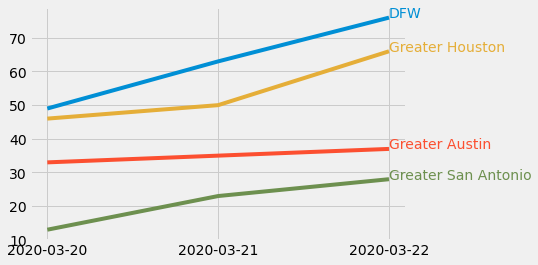

In [10]:
last_cnt = set()
for metro in df_metro.index:
    last_cnt = df_metro.loc[metro][-1]
    while last_cnt in last_cnts:
        last_cnt -= 1
    last_cnts.add(last_cnt)
    line = plt.plot(x, df_metro.loc[metro], label=metro)
    color = line[0].get_color()
    plt.text(x[-1], last_cnt, metro, color=color)

    #plt

# Per capita

In [35]:
df_metro_per_capita = df_metro.copy()

In [37]:
df_metro_per_capita.loc['DFW'] = df_metro_per_capita.loc['DFW'] * 1_000_000 / constants.POPULATION_DFW_2018_EST

In [38]:
df_metro_per_capita.loc['Greater Houston'] = df_metro_per_capita.loc['Greater Houston'] * 1_000_000 / constants.POPULATION_GREATER_HOUSTON_2018_EST

In [39]:
df_metro_per_capita.loc['Greater Austin'] = df_metro_per_capita.loc['Greater Austin'] * 1_000_000 / constants.POPULATION_GREATER_AUSTIN_2018_EST

In [40]:
df_metro_per_capita.loc['Greater San Antonio'] = df_metro_per_capita.loc['Greater San Antonio'] * 1_000_000 / constants.POPULATION_GREATER_SAN_ANTONIO_2018_EST

In [42]:
df_metro_per_capita

,2020-03-20,2020-03-21,2020-03-22
DFW,6.371564,8.192010,9.882425
Greater Austin,15.219184,16.141559,17.063933
Greater Houston,6.573885,7.145528,9.432096
Greater San Antonio,5.162754,9.134103,11.119777


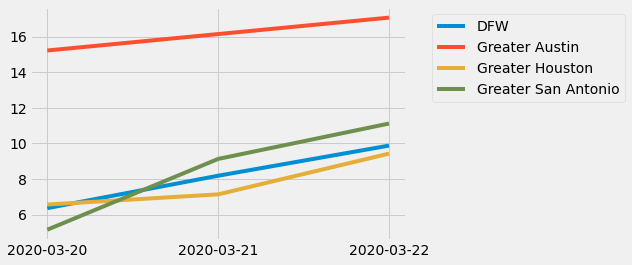

In [46]:
for metro in df_metro.index:
    line = plt.plot(x, df_metro_per_capita.loc[metro], label=metro)
    color = line[0].get_color()
    plt.legend(bbox_to_anchor=(1.05, 1))

# TODO:

1. compare to other large metro areas outside of Texas (https://en.wikipedia.org/wiki/List_of_metropolitan_statistical_areas)
2. Growth rate pctg 7 day moving window (need 7 days first)
